<a href="https://colab.research.google.com/github/rashida048/Tensorflow/blob/main/Image_classification_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-12-03 20:14:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80, 2607:f8b0:4023:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   105MB/s    in 0.6s    

2021-12-03 20:14:02 (105 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
100/100 - 98s - loss: 0.6780 - accuracy: 0.5680 - val_loss: 0.6932 - val_accuracy: 0.5210 - 98s/epoch - 982ms/step
Epoch 2/50
100/100 - 98s - loss: 0.6317 - accuracy: 0.6395 - val_loss: 0.6085 - val_accuracy: 0.6610 - 98s/epoch - 980ms/step
Epoch 3/50
100/100 - 98s - loss: 0.5864 - accuracy: 0.6895 - val_loss: 0.6007 - val_accuracy: 0.6660 - 98s/epoch - 978ms/step
Epoch 4/50
100/100 - 98s - loss: 0.5562 - accuracy: 0.7145 - val_loss: 0.5799 - val_accuracy: 0.6940 - 98s/epoch - 982ms/step
Epoch 5/50
100/100 - 98s - loss: 0.5272 - accuracy: 0.7280 - val_loss: 0.5874 - val_accuracy: 0.6810 - 98s/epoch - 983ms/step
Epoch 6/50
100/100 - 98s - loss: 0.5111 - accuracy: 0.7460 - val_loss: 0.5558 - val_accuracy: 0.7190 - 98s/epoch - 982ms/step
Epoch 7/50
100/100 - 98s - loss: 0.4820 - accuracy: 0.7745 - val_loss: 0.5473 - val_accuracy: 0.7260 - 98s/epoch - 984ms/step
Epoch 8/50
100/100 - 98s - loss: 0.4547 - accuracy: 0.7885 - val_loss: 0.5518 - val_accuracy: 0.7240 - 98s/epoch - 982

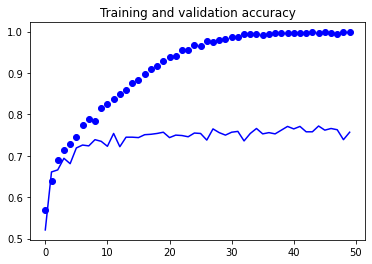

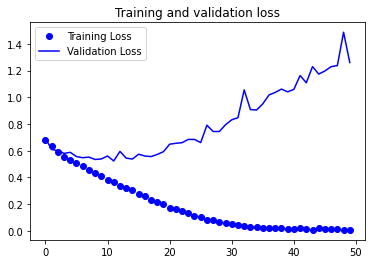

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/30
100/100 - 107s - loss: 109.6622 - accuracy: 0.6350 - val_loss: 0.6193 - val_accuracy: 0.6300 - 107s/epoch - 1s/step
Epoch 2/30
100/100 - 106s - loss: 7.1897 - accuracy: 0.5940 - val_loss: 0.6683 - val_accuracy: 0.5650 - 106s/epoch - 1s/step
Epoch 3/30
100/100 - 106s - loss: 2.5004 - accuracy: 0.6010 - val_loss: 0.6790 - val_accuracy: 0.5430 - 106s/epoch - 1s/step
Epoch 4/30
100/100 - 105s - loss: 1.2356 - accuracy: 0.5820 - val_loss: 0.6827 - val_accuracy: 0.5050 - 105s/epoch - 1s/step
Epoch 5/30
100/100 - 108s - loss: 0.8047 - accuracy: 0.5835 - val_loss: 0.6840 - val_accuracy: 0.5020 - 108s/epoch - 1s/step
Epoch 6/30
100/100 - 106s - loss: 0.7438 - accuracy: 0.5875 - val_loss: 0.6835 - val_accuracy: 0.5060 - 106s/epoch - 1s/step
Epoch 7/30
100/100 - 105s - loss: 0.7075 - accuracy: 0.6000 - val_loss: 0.6817 - val_accuracy: 0.5090 - 105s/epoch - 1s/step
Epoch 8/30
100/100 - 105s - loss: 0.7011 - accuracy: 0.6145 - val_loss: 0.6802 - val_accuracy: 0.5010 - 105s/epoch - 1s/ste